##  QUESTION1

Q1a)


In [34]:
#The Predicted Value of y_hat(x) for x = 1.
y_hat= round(0.4 + 0.8*(1),2)
y_true = 1
y_hat
# The error for when x=1
error = round(0.5 * (y_hat - y_true)**2,2)

#print the y_hat and error
print("y_hat = ", y_hat)
print("error = ", error)

y_hat =  1.2
error =  0.02


Q1b)

In [35]:
#The Predicted Value of y_hat(x) for x = 2.
y_hat= 0.4 + 0.8*(2)
y_true = 3
y_hat

# The error for when x=2
error = round(0.5 * (y_hat - y_true)**2,2)

#print the y_hat and error
print("y_hat = ", y_hat)
print("error = ", error)

y_hat =  2.0
error =  0.5


Q1c)

In [36]:
#sum of squares error for this model

def y_hat(x):
    y = 0.4 + 0.8*(x)
    return y

# x values
x_values = [1,2,3,4,5]
# y avlues
y_values = [1,3,2,3,5]
y_predicted = []
error = 0.0
for x in x_values:
    y_predicted.append(round(y_hat(x),2))

for i in range(len(y_values)):
    error += 0.5 * (y_values[i] - y_predicted[i])**2

error = round(error, 2)
error

1.2

## QUESTION 4

# a)

i. Generating random sample data

In [37]:
import numpy as np

mean = 0
std = 10
size = 150

sample = np.random.normal(mean, std, size)


ii. Constructing design matrix from sample data

In [38]:
def designMatrix(s, rows, cols):
    design = np.ones((rows, cols))
    for i in range(cols):
        design[:,i] = s**i
    return design

design = designMatrix(sample, 150, 3)

print(design)


[[ 1.00000000e+00  2.08485047e+00  4.34660150e+00]
 [ 1.00000000e+00 -6.59822466e+00  4.35365686e+01]
 [ 1.00000000e+00 -2.22602651e+00  4.95519402e+00]
 [ 1.00000000e+00  1.45823099e+01  2.12643763e+02]
 [ 1.00000000e+00 -2.23258133e+00  4.98441938e+00]
 [ 1.00000000e+00  1.56812016e+01  2.45900083e+02]
 [ 1.00000000e+00  2.10613484e+01  4.43580395e+02]
 [ 1.00000000e+00  6.57614259e+00  4.32456514e+01]
 [ 1.00000000e+00  5.53778484e+00  3.06670609e+01]
 [ 1.00000000e+00 -1.04885236e+01  1.10009126e+02]
 [ 1.00000000e+00  2.03075644e+00  4.12397172e+00]
 [ 1.00000000e+00 -1.74226425e+00  3.03548473e+00]
 [ 1.00000000e+00 -1.73727621e+01  3.01812862e+02]
 [ 1.00000000e+00 -4.75694107e+00  2.26284884e+01]
 [ 1.00000000e+00 -7.23321641e+00  5.23194197e+01]
 [ 1.00000000e+00 -1.23921696e+01  1.53565868e+02]
 [ 1.00000000e+00  4.79773631e+00  2.30182737e+01]
 [ 1.00000000e+00 -1.56889250e+01  2.46142366e+02]
 [ 1.00000000e+00 -4.36459976e-01  1.90497310e-01]
 [ 1.00000000e+00  3.15805985e+

iii. Sample true values for theta, (3 values - corresponds to features)

In [39]:
theta = np.random.uniform(0, 1, 3)

theta0 = theta[0]
theta1 = theta[1]
theta2 = theta[2]

print(theta)

[0.1601851  0.60695845 0.64785934]


iv. Generate y values using design matrix and true parameter. Also add noise to make data more realistic

In [40]:
mean = 0
std = 8
size = 150

noise = np.random.normal(mean, std, size)

y = np.dot(design, theta) + noise

print(y)

[-1.21931740e+01  1.07860102e+01  1.18865676e+01  1.51253042e+02
 -1.09987591e+01  1.87348854e+02  2.93636013e+02  4.05205342e+01
  4.66326637e+01  5.45253606e+01 -2.86253156e-01 -4.64988806e+00
  1.93490052e+02  2.84718391e+01  2.77459230e+01  8.82558556e+01
  1.25493825e+01  1.52417851e+02  5.72929257e+00 -1.00920061e+01
  5.58119641e+01  1.20490917e+01  5.15853219e+01  3.35575164e+01
  3.61015770e+00  5.66470477e+00  7.88260698e+01  5.72750962e+01
  1.40567321e+01  3.43726298e+01  4.63074445e+01  3.88395588e+01
 -5.53284831e+00  5.17548839e+01  6.90832918e+01  1.39425719e+02
  5.96324758e+00  5.06462914e+01  2.06379795e+01  2.35855472e+02
  5.86482941e+00  3.27521554e+00  1.14002767e+02  2.55375632e+01
  1.24849338e+02 -5.70059294e+00  2.40056776e+01  2.90138674e+00
 -6.47398028e-01  1.35416401e+02  5.94826060e+01 -8.62542976e+00
  1.71415216e+02  6.95386934e+01  8.25616084e+01  1.60806284e+02
  1.66459417e-02  1.40617781e+01  1.78547510e+02  7.58774412e+00
  9.27688424e+00  9.10822

v. Plot sample data with generated y values

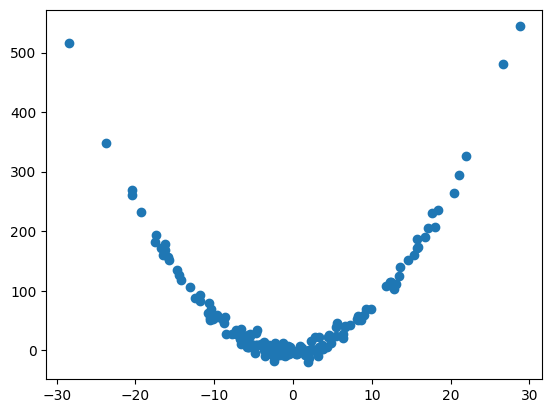

In [41]:
import matplotlib.pyplot as plt

plt.scatter(sample, y)
plt.show()

vi. Split sample data into training, testing and validation data

In [42]:
#90 of 150 for training (60%)
#30 of 150 for testing (20%)
#30 of 150 for validation (20%)

#Training
training_x_values = sample[:90]
training_y_values = y[:90]
trainX = design[:90]

#Testing
testing_x_values = sample[120:150]
testing_y_values = y[120:150]

#Validation
validation_x_values = sample[90:120]
validation_y_values = y[90:120]

# print(training_x_values)


# b)

i. Use Moore-Penrose pseudo-inverse to calculate the closed form solution

In [43]:
def moore_penrose(DMatrix, y_values):
    dmTranspose = np.transpose(DMatrix)
    firstPart = np.linalg.inv(np.dot(dmTranspose, DMatrix))
    secondPart = np.dot(dmTranspose, y_values)
    finalMoore = np.dot(firstPart, secondPart)
    return finalMoore

moore_penrose1 = moore_penrose(trainX, training_y_values)

print(moore_penrose1)
print(theta)


[0.97899035 0.69811811 0.64636436]
[0.1601851  0.60695845 0.64785934]


ii. How close are the learned parameter values to the true parameters?

In [44]:
# The learned parameter values, with the exception of theta0, which is off from the true value by a significant value.
# While theta1 is off by approx. 0.004 and theta2 is off by approx 0.005, which is relatively close to the true parameters  

iii. Compute the training and validation error of the model

In [45]:
import math

def Error(x_values, y_values):
    sum = 0
    index = 0

    for x in x_values:
        y_predicted = moore_penrose1[0] + moore_penrose1[1] * x + moore_penrose1[2] * x**2
        error = y_values[index] - y_predicted
        sum += math.pow(error,2)
        index += 1

    totalError = 0.5 * sum
    return totalError, y_predicted

trainingError, training_y = Error(training_x_values, training_y_values)
validationError, validated_y = Error(validation_x_values, validation_y_values)

print(trainingError)
print(validationError)

3218.7186421532588
925.692514842899


iv. Plot of the data and the regression model

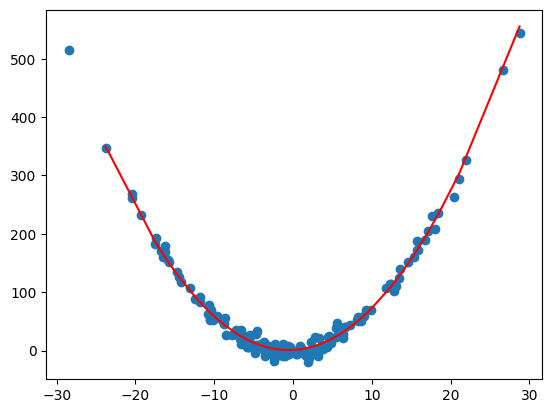

In [46]:
import matplotlib.pyplot as plt

sorted_trainX = trainX[trainX[:,1].argsort()]
yValues = np.dot(sorted_trainX, moore_penrose1)


plt.scatter(sample, y)
plt.plot(sorted_trainX[:,1], yValues, "r")
plt.show()

v. Repeat the above process using Gradient Descent to train your model. In addition, plot the
training error of your regression model over time (observe or capture the training error every 20
parameter updates/time steps). Your plot should look like Figure 2c.

C:\Users\muaaz\AppData\Local\Temp\ipykernel_25780\346220665.py:16: RuntimeWarning: overflow encountered in square
  errors.append(np.mean(error**2))
C:\Users\muaaz\AppData\Local\Temp\ipykernel_25780\346220665.py:22: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * grad


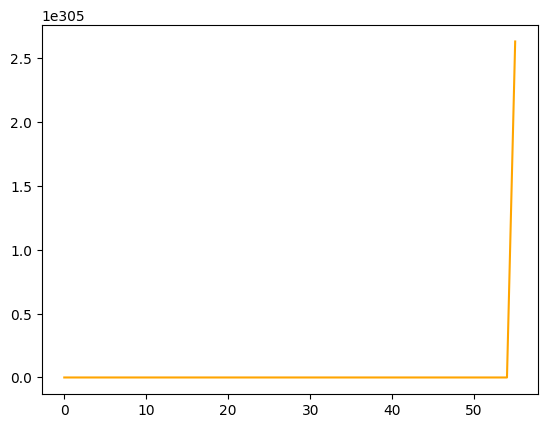

In [47]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    # Initialize parameters
    m, n = X.shape
    theta = np.zeros((n, 1))
    errors = []

    # Perform gradient descent
    for i in range(num_iterations):
        # Compute predictions
        y_pred = X.dot(theta)

        # Compute errors
        error = y_pred - y
        errors.append(np.mean(error**2))

        # Compute gradients
        grad = (2/m) * X.T.dot(error)

        # Update parameters
        theta = theta - learning_rate * grad

    return theta, errors


theta,error = gradient_descent(trainX,training_y)

plt.plot(error,color="orange")
